# Monte carlo simulation
#### Forecasting stock price, and theoretically pricing probability based "options" contracts.

### Table of content

1. Abstract
2. Assumptions
3. Simulation
   1. Gaussian distribution
   2. Geometric Brownian Motion
   3. Monte Carlo stock simulation
   4. Monte Carlo stock distribution
   
4. Option pricing
   1. Financial instrument characteristics
   2. Manual calculator
   3. Automatic calculator

5. Interpretation
   1. Conclution

6. Discussion
7. References

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

### Abstract

Monte Carlo methods are a methodology by which we create a given model of an event, generate a series of random values from that model, and apply those values as inputs to a scenario many times in order to simulate what would happen over a long period of time (finding the probability in all else equal situation). This allows us to make reasonable models of events whose probability distribution is inherently non-deterministic or at least very difficult to model with analytical methods.

- Can we use Monte Carlo method for pricing stock option contracts? 
- What is the fair price (probability wise)?
- What is their market price and what forms it?

### Assumptions
For stock market we will use the Geometric Brownian Motion (GBM), which is technically a Markov process. Stock price have minimum value of 0 and maximum of infinity and follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH)—past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements.

$$ \frac{\Delta S}{S} =  \mu\Delta t + \sigma\epsilon\sqrt\Delta t  $$

*Where:*\
$S$ - stock price\
$\mu$ - expected return\
$\Delta t$ - elapsed time\
$\epsilon$ - the random variable\
$\sigma$ - standard deviation of returns

If we rearrange the formula to solve just for the change in stock price, we see that GBM says the change in stock price is the stock price "S" multiplied by the two terms found inside the parenthesis below:

$$ \Delta S =  S_{t-1}(\mu\Delta t + \sigma\epsilon\sqrt\Delta t)  $$

The first term is a "drift" and the second term is a "shock." For each time period, our model assumes the price will "drift" up by the expected return. But the drift will be shocked (added or subtracted) by a random shock. The random shock will be the standard deviation "s" multiplied by a random number "e." This is simply a way of scaling the standard deviation.

Stock share price never go below zero, so assuming Gaussian distribution around zero level will be wrong. This is why we use GBM.

<div>
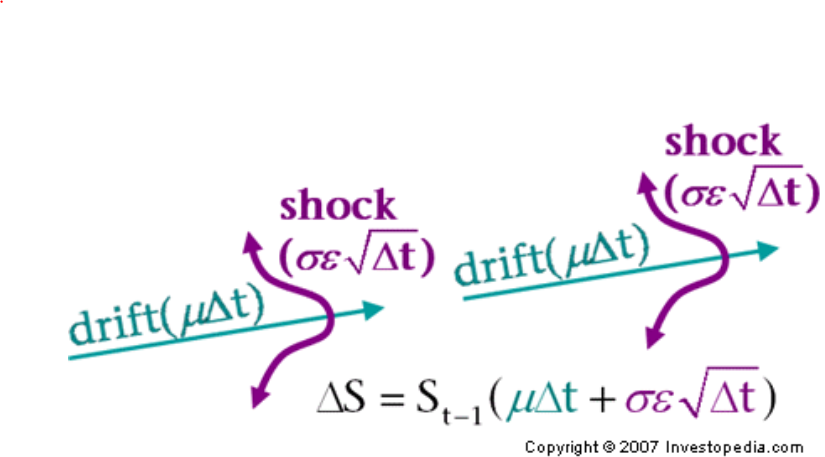
</div>

### Simulation

What is a simulation?
 - Program that is run on a computer and that uses step-by-step methods to explore the approximate behavior of a mathematical model. Usually this is a model of a real-world system (although the system in question might be an imaginary or hypothetical one)
 - There are three general categories of purposes to which computer simulations can be put. Simulations can be used for heuristic purposes, for the purpose of predicting data that we do not have, and for generating understanding of data that we do already have.

How is simulation used in science?
 - A simulation that accurately mimics a complex phenomenon contains a wealth of information about that phenomenon. For example variables such as temperature, pressure, humidity, and wind velocity are evaluated at thousands of points by the supercomputer as it simulates the development of a storm, for example. Such data, which far exceed anything that could be gained from launching a fleet of weather balloons, reveals intimate details of what is going on in the storm cloud. (Kaufmann and Smarr 1993, 4)

There are different kinds of events.

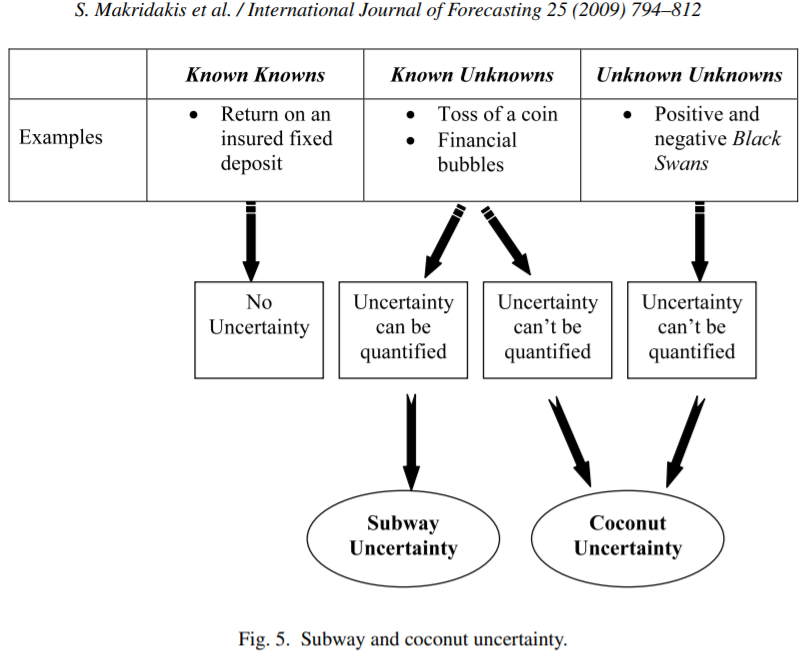

Subway uncertainty can be represented by predicting the train arrival at the same spot for example, coconut uncertainty cannot be predicted at all and is something that you do not even assume. It happens but with the help of sound dynamic hedging, market makers survive those events. \
In the next simulations we are going to plot and try to quantify uncetrainty (subway) of stock price movements (known unknowns) based on historical data.

#### Normal distribution
Imaginary stock with starting price of 1$ and one standard deviation of 0.6c per day

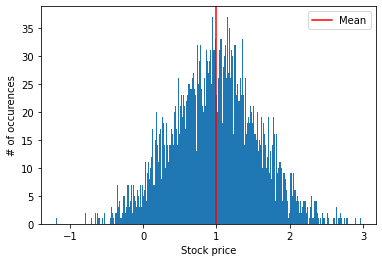

In [2]:
mu, sigma = 1, 0.6 # mean and standard deviation/ initial stock price and volatility
rand_num = np.random.normal(mu, sigma, 4200) # generate normal distribution

plt.hist(rand_num, bins=420)
plt.axvline(np.mean(rand_num), color='r', label='Mean')
plt.xlabel('Stock price')
plt.ylabel('# of occurences')
plt.legend()
plt.show()

 -  As we can see this distribution tends to go below zero which is not natural for the products we will use in this project

Breaking down the np.random.normal function

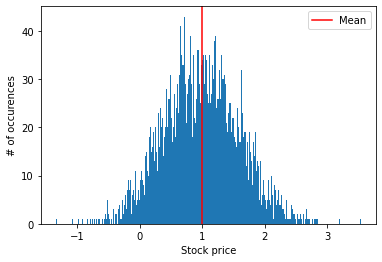

In [3]:
rand_num = 1 + np.random.randn(4200) * 0.6

plt.hist(rand_num, bins=420)
plt.axvline(np.mean(rand_num), color='r', label='Mean')
plt.xlabel('Stock price')
plt.ylabel('# of occurences')
plt.legend()
plt.show()

#### Geometric brownian motion

Stock with starting price of 100% and standard deviation of 20% annualized\
In order to follow best practices the GBM uses returns instead of absolute prices. Scaling the coef. with particular price will be the best way.

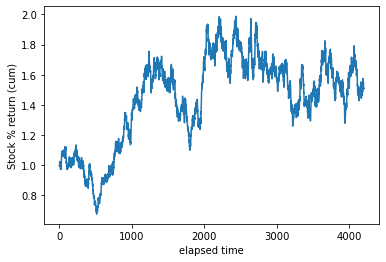

In [4]:
rand_walk = np.cumprod(1+np.random.randn(4200)*0.2/np.sqrt(252))
plt.plot(rand_walk)
plt.xlabel('elapsed time')
plt.ylabel('Stock % return (cum)')
plt.show()

 - The following graph represent a random walk with initial price of 1 dollar and standard deviation/volatility of 20% per year.
 - Daily volatility $=  \frac{vol. annualized}{\sqrt252}$
 
This shows just one scenario of future expectations based on all else equal (static) volatility for the whole period.\
The price will never go below zero with this kind of calculation.

#### Monte carlo simulation

We are going to scale the same simulation method as above, but just plot all the random simulation on one chart which will look like cone of entropy. Lets peak into the overlaped imaginary future returns.

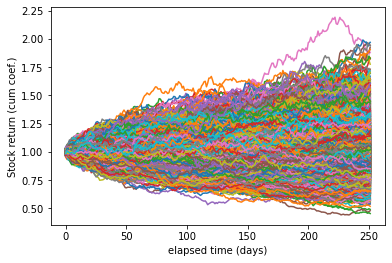

In [5]:
rand_walk = np.cumprod(1+np.random.randn(4200,252)*0.2/np.sqrt(252), axis=1)
rand_walk.shape  # matrix of 4200x252 simulations

for simul in rand_walk:
    plt.plot(simul)
    plt.xlabel('elapsed time (days)')
    plt.ylabel('Stock return (cum coef.)')

 - This graph shows us 4200 scenarios of cumulative returns for one business year period.
 - The mathematical formula does not include the expected drift ($\mu\Delta t $), so the mean of all prices after one business year should be around the starting price.

In [6]:
def mc_simulation(n_days=252, n_trails=4200, start_price=1, vol=0.2):
    '''
Run Monte Carlo simulation using GBM and scale by start_price.

'''
    rand_walk = np.cumprod(1+np.random.randn(n_trails,n_days)*vol/np.sqrt(n_days), axis=1) * start_price
    rand_walk.shape  # matrix of 4200 simulations for 252 days each

    for sim in rand_walk:
        plt.plot(sim)
        plt.xlabel('elapsed time (days)')
        plt.ylabel('Forecast price')

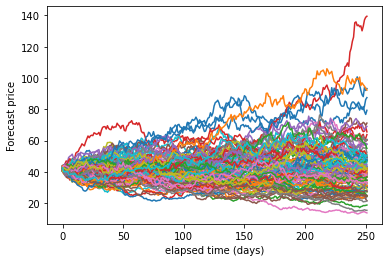

In [8]:
mc_simulation(n_trails=100, start_price=42, vol=0.4)

#### Monte carlo distribution

In order to see if we fixed the problem with going below zero when stock is close to zero level, we need to plot the outter layer or 252nd day values of every simulation. 

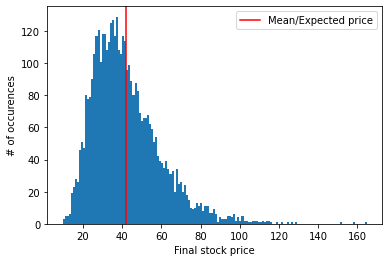

Mean/Expected price: $ 42.14
Expected yearly drift (CGAR): 0 %
Expected daily shock (+/-):  2.52 %


In [9]:
rand_walk = np.cumprod(1+np.random.randn(4200,252)*(0.4/np.sqrt(252)), axis=1) * 42

plt.hist(rand_walk[:,-1], bins=148)
plt.axvline(np.mean(rand_walk), color='r', label='Mean/Expected price')
plt.xlabel('Final stock price')
plt.ylabel('# of occurences')
plt.legend()
plt.show()

print('Mean/Expected price: $', round(rand_walk[:,-1].mean(),2))
print('Expected yearly drift (CGAR): 0 %')
print('Expected daily shock (+/-): ', round(0.4/np.sqrt(252),4)*100, "%")

 In this histogram we can see that after 252 day period for each simulation out of 4200 we find out that stock with initial price of 42$ for example can't go below zero and that indicates positive skew of the distribution.
 
 - To keep everything simple and standard we are not going to include factors other than historical volatility that will help us measure potential future shocks.  We are going to exclude expected return(drift), interest rates, dividend payments and other small adjustments used in the real complex and competitive financial world.
 - Our expectations about the distribution mean should end around the initial starting price, because we are not including the drift part of the formula.
 - The expected daily shock is the historical yearly volatility (40%) which is the standard deviation of daily returns devided by $\sqrt 252$ then multiplied by some random number to simulate.

### Option pricing

#### Financial instrument characteristics
HV - Historical volatility\
IV - Implied volatility\
ATM - at the money

A stock option is a contract between two parties that gives the buyer the right to buy or sell underlying stocks at a predetermined price and within a specified time period.\
A seller of the stock option is called an option writer, where the seller is paid a premium from the contract purchased by the buyer. The premium(price) of each strike is based on the probability of underlying stock ending above for call or below for put based on some statistical model.\
In order to price option we are going to average all the potentital simulation end values, above or below the strike.


There are two types of stock options:
 - A stock call option, which grants the purchaser the right but not the obligation to buy stock. A call option will increase in value when the underlying stock price rises.
 - A stock put option, which grants the buyer the right to sell stock short. A put option will increase in value when the underlying stock price drops.

The following graphs are showing the profit and loss(P/L) for the expiration day.\
Premium is solely based on set of future value probabilities.

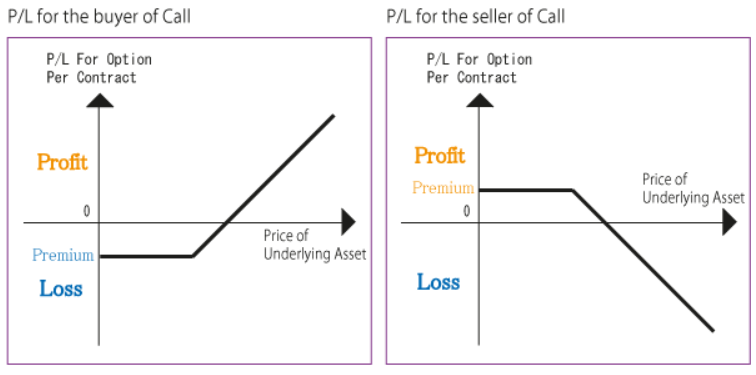

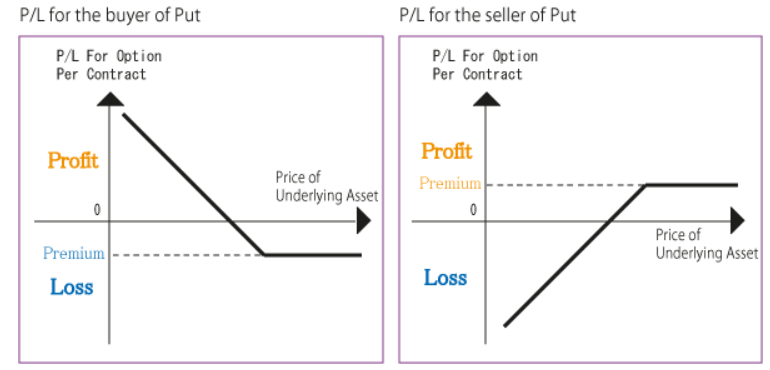

#### Manual calculator

In order to check our method we are going to create simple calculator that we will compare to a working real one.

In [9]:
def mc_opt_price(strike_price=100, dte=252, n_trails=420000, vol=0.25):
    '''
Simple Monte Carlo options price manual calculator.

'''
    # Get last price
    last_price = 100
    
    # Calculate historical volatility
    vol = vol/np.sqrt(dte)
    
    # Price options based on strike
    rand_walk = np.cumprod(1+np.random.randn(n_trails, dte)*vol, axis=1) * last_price
    
    call = np.mean((rand_walk[:,-1]-strike_price)*((rand_walk[:,-1]-strike_price)>0))  # avg. all possible scenarios above strike
    put = np.mean(-(rand_walk[:,-1]-strike_price)*((rand_walk[:,-1]-strike_price)<0))  # avg. all possible scenarios below strike
    
    print('Theoretical price')
    print('Call = ', round((call),4))
    print('Put = ', round((put),4))

In [10]:
mc_opt_price(strike_price=100, dte=252, vol=0.25)

Theoretical price
Call =  9.9826
Put =  9.9225


 - With 420000 simulations our manual calculator generates values with error of about few cents.
 - Comparing the results with: http://www.option-price.com/index.php w/ settings: [100,100,365,0,0,25,4,1]

#### Automated calculator

In this step we are actually building a model. After that it can be scaled to whole option chain.\
We are going to use "pandas_datareader" in order to download daily stock prices directly into data frame.\
Usually for the historical volatility(HV) market uses calendar month or 21 day moving avg of the stock returns as indicator. So we take 1 calendar month worth of data.

In [30]:
def mc_opt_price_auto(ticker='AAPL', strike_price=100, dte=252, n_trails=1000000, start='4/7/2021'):
    '''
Run Monte Carlo simulation using GBM distribution for strike price of particular ticker symbol.
Ex. (ticker='AAPL', dte=days to expiration, n_trails=number of simulations, start=historical returns start date)

'''
    # Load historical data
    ticker = data.DataReader(ticker, 'yahoo', start=start)
    
    # Get last price
    last_price = ticker['Adj Close'][-1]
    
    # Calculate historical volatility
    vol = ticker['Adj Close'].pct_change().std()
    
    # Price options based on strike
    rand_walk = np.cumprod(1+np.random.randn(n_trails, dte)*vol, axis=1) * last_price
    
    call = np.mean((rand_walk[:,-1]-strike_price)*((rand_walk[:,-1]-strike_price)>0))  # avg. all possible scenarios above strike
    put = np.mean(-(rand_walk[:,-1]-strike_price)*((rand_walk[:,-1]-strike_price)<0))  # avg. all possible scenarios below strike
    
    
    print("Last stock price: ", last_price)
    print("Historical volatility: ", round(vol*np.sqrt(252),4))
    print('Call price = ', round((call),4))
    print('Put price = ', round((put),4))

In [32]:
mc_opt_price_auto(ticker='AAPL', strike_price=130, dte=259)

Last stock price:  130.2100067138672
Historical volatility:  0.2292
Call price =  12.1264
Put price =  11.9626


### Interpretation

Options chain for AAPL at May7 2021\
Left side - CALLS\
Right side - PUTS

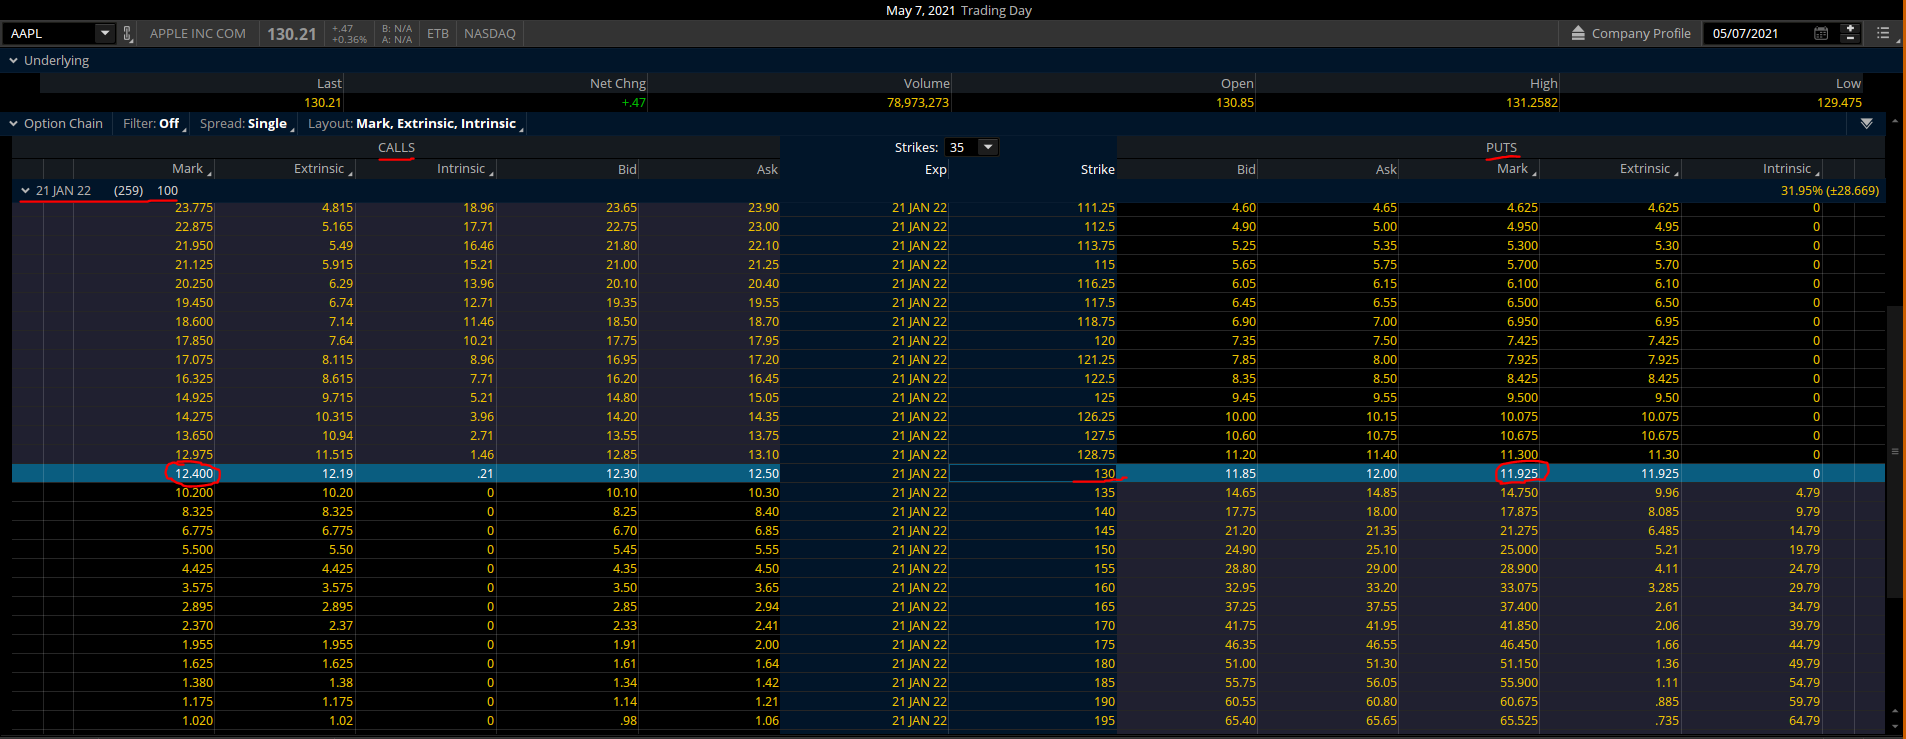

 - Theoretical price from the model is very close to the actual market price, given the model lack of complexity as mentioned above.
 - Actual market price CALL: 12.400, PUT: 11.925
 - Theoretical model price CALL: 12.120, PUT: 11.963 

#### Conclution
In this research we created a simple model that can calculate the future probability of stock price based on historical volatility. When we use HV we assume that the stock prices are going to move in the future like they moved in the past month for example. If we want to use better estimate we need to change the HV with Implied volatility metric(forward looking indicator) that takes the current at the money(ATM) prices of the strike which is closer to the underlying price, in this case 130. The ATM prices are influenced only from pure supply and demand auction. If they are much more inflated than our historical data approach model, we will know that market participants are pricing potential increase of future volatility and so the IV will be greater than HV (which is true most of the time - market overpays for insurance).

Option market makers are using this method of calculating the probability with many little adjustments and calibrations in order to gain an edge (positive mathematical expectation), they also hedge their options books from uknown unkowns (sometimes dynamic non-linear buying and selling underlying stock to minimize shocks (neutralize) their portfolio risk to minimum).

In order to stay in options business you always need to have people fooled by randomness, not knowing the actual worth of a probability based contract for example.

### Discussion

In order to proof the model assumptions, that publicly traded stocks are following random walk, we should test the distribution.

Random walk theory believes it's impossible to outperform the market without assuming additional risk (shock). It considers technical analysis undependable because chartists only buy or sell a security after an established trend has developed. Likewise, the theory finds fundamental analysis undependable due to the often-poor quality of information collected and its ability to be misinterpreted. \
Critics of the theory contend that stocks do maintain price trends over time – in other words, that it is possible to outperform the market by carefully selecting entry and exit points for equity investments.

The best way to test for random walk behaviour is to transform non-stationary time series into stationary.

The stationary (differenced) series is the change between consecutive observations in the original series, and can be written as:
$$ y'_t = y_{t} - y_{t-1} $$

#### Random walk models are widely used for non-stationary data, particularly financial and economic data. Random walks typically have:
 - long periods of apparent trends up or down
 - sudden and unpredictable changes in direction
 
The forecasts from a random walk model are equal to the last observation, as future movements are unpredictable, and are equally likely to be up or down. Thus, the random walk model underpins naïve forecasts (using last observed value for future expected value).

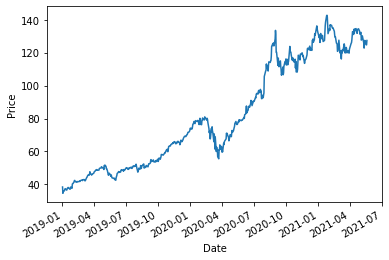

In [10]:
# Non-stationary
stock = data.DataReader('AAPL', 'yahoo', start='1/1/2019')
prices = stock['Adj Close']

prices.plot()
plt.ylabel("Price")
plt.show()

AxesSubplot(0.125,0.2;0.775x0.68)


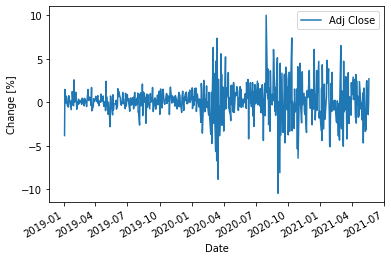

In [11]:
# Differencing (removing the trend) daily percent changes of stock price
stock_diff = prices.diff()

print(stock_diff.plot(legend=True))
plt.ylabel('Change [%]')
plt.show()

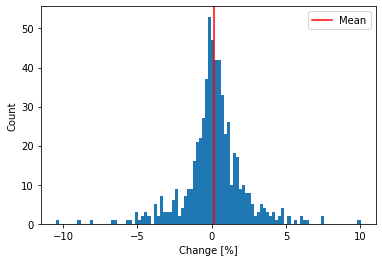

Mean of returns:  0.15 %


In [12]:
# Stationary distribution
plt.hist(stock_diff, bins=100)
plt.axvline(np.mean(stock_diff), color='r', label='Mean')
plt.xlabel('Change [%]')
plt.ylabel('Count')
plt.legend()
plt.show()
print('Mean of returns: ' ,round(np.mean(stock_diff),2), '%')

Just like flipping a coin, after seeing some historical behaviour we can determine the probability of future event with mathematical formula.\
Most of the financial instruments are following a random walk. Based on historical movements we can determine their behaviour and calculate the probability of future events (shocks) based on their historical volatility. The more simulations the better the overall accuracy, but all comes with a price of slow computation process.\
The industry uses Black-scholes method of pricing options and their derivatives rather than Monte Carlo which is iterative process. 

In [13]:
import time as time

for i in [420, 4200, 42000, 420000, 1000000]:
    start = time.time()
    rand_walk = np.cumprod(1+np.random.randn(i, 252)*0.2/np.sqrt(252), axis=1) * 100
    print(i, 'simulations | Call price =', round((np.mean((rand_walk[:,-1]-100)*((rand_walk[:,-1]-100)>0))),2))
    print('Takes : ', round((time.time()-start),2),'sec')

420 simulations | Call price = 6.72
Takes :  0.01 sec
4200 simulations | Call price = 8.1
Takes :  0.04 sec
42000 simulations | Call price = 7.88
Takes :  0.38 sec
420000 simulations | Call price = 7.95
Takes :  4.0 sec
1000000 simulations | Call price = 7.96
Takes :  9.52 sec


 - Usually at around 1 000 000 simulation the error is the lowest, compared to the real market prices.
 - The problem is that in liquid markets every second the underlying stock price changes and with Monte Carlo method we need around several seconds until the model calculates the fair price. Market making means that you are at the other side of each successful trade, so this is dynamic, with high volumes and Monte Carlo iterative process will fall short.
 - We can try using the GPU power for matrix operations when CPU is not performing well, it is around 15 times faster.

### References

* https://finance.yahoo.com/
* https://www.tdameritrade.com/tools-and-platforms/thinkorswim.html
* https://www.investopedia.com/articles/07/montecarlo.asp
* https://corporatefinanceinstitute.com/resources/knowledge/finance/stock-option/
* https://www.quantconnect.com/tutorials/introduction-to-options/historical-volatility-and-implied-volatility
* https://www.option-dojo.com/en/le/summary.html
* https://plato.stanford.edu/entries/simulations-science/#PurSim
* Forecasting and uncertainty in the economic and business world (Spyros Makridakisa, Robin M. Hogarthb, Anil Gabac)
International Journal of Forecasting 25 2009